# Perceptron monocapa

Un perceptrón monocapa está compuesto de una capa pasiva de entrada, y una sola capa activa que también sirve de capa de salida.

El input de un perceptron determina el estado de las neuronas pasivas de la capa de entrada, $x$.
Se considera, además, una neurona pasiva de estado fijo $x_{n_e}=-1$, para que haga las veces de umbral de activación.
Ante una entrada $x$, la salida de la red neuronal viene dada por
$$
y_j(x)
=
g(h_{j}(x))
$$
donde
$$
h_j
=
%\sum_{i=1}^{n_e}
\sum_i
w_{ji}x_i
$$
para $j=1,...,n_s$, y $g$ es una función de activación.
Por ejemplo, una ReLU, la cual viene dada por
$g(h) = h$ si $h>0$ y $g(h)=0$ si $h\leq 0$.

Para entrenar la red, usamos como función costo el error cuadrático sobre el conjunto de entrenamiento $\{e_m,s_m:m=1,...,M\}$, al cuál lo expresamos como una función de $w$
$$
E(w)
=
\frac{1}{2}
%\sum_{m=1}^M
\sum_{m}
%\sum_{j=1}^{n_s}
\sum_{j}
(y_{jm}(w)-s_{mj})^2
$$
donde $s_{mj}$ es la salida deseada en la $j$-ésima neurona ante el $m$-ésimo ejemplo, $y_{mj}$ es la salida obtenida en la $j$-esima neurona ante el $m$-ésimo ejemplo, y $n_s$ es el número de neuronas de salida.
Por otro lado,
$$
y_{jm}(w)
=
g(h_{jm}(w))
$$
donde
$$
h_{jm}(w)
=
\sum_{i=0}^{n_e}
w_{ji}e_{mi}
$$
Nos interesa calcular el gradiente de $E(w)$
\begin{eqnarray}
\frac{\partial E}{\partial w_{pq}}
&=&
%\sum_{m=1}^M
\sum_m
%\sum_{j=1}^{n_s}
\sum_j
(y_{jm}(w)-s_{mj})
\frac{\partial y_{jm}}{\partial w_{pq}}
\\
&=&
%\sum_{m=1}^M
\sum_m
%\sum_{j=1}^{n_s}
\sum_j
(y_{jm}(w)-s_{mj})
g'(h_{jm}(w))
\frac{\partial h_{jm}}{\partial w_{pq}}
\\
&=&
%\sum_{m=1}^M
\sum_m
%\sum_{j=1}^{n_s}
\sum_j
(y_{jm}(w)-s_{mj})
g'(h_{jm}(w))
\delta_{jp}
e_{mq}
\\
&=&
%\sum_{m=1}^M
\sum_m
(y_{pm}(w)-s_{mp})
g'(h_{pm}(w))
e_{mq}
\end{eqnarray}
puesto que
$$
\frac{\partial h_{jm}}{\partial w_{pq}}
=
%\sum_{i=1}^{n_e}
\sum_i
\frac{w_{ji}}{w_{pq}}
e_{mi}
=
%\sum_{i=1}^{n_e}
\sum_i
\delta_{jp}
\delta_{iq}
e_{mi}
=
\delta_{jp}
e_{mq}
$$

Recordar que, en el caso de una ReLU, $g'(h)=\Theta(h)$, donde $\Theta(h)=1$ si $h>0$ y $\Theta(h)=0$ si $h\leq 0$.

Para actualizar los pesos sinápticos en la $(\tau+1)$-ésima época de entrenamiento, utilice la regla
$$
w^{\tau}_{ji} \to w^{\tau+1}_{ji} = w^{\tau}_{ji} - \eta \frac{\partial E}{\partial w_{ji}}
$$
para todo $ji$.

## **Ejercicio 1**

Genere un conjunto de entrenamiento compuesto por $M$ puntos en $\mathbb{R}^{n_e}$, distribuidos en $n_s$ nubes, con $m_c$ puntos en la nube $c$.
Notar que $c=1,...,n_e$ nubes y, en total, se generarán $M=\sum_c m_c$ puntos.

Para generar las nubes:

* genere aleatoriamente $n_s$ puntos en $\mathbb{R}^{n_e}$ a los que llamaremos centros, sorteando los valores de las coordenadas a partir de una distribución normal, y

* para cada centro $c$, genere $m_c$ puntos aleatorios alrededor del mismo, sumando sus coordenadas a números aleatorios generados con una Gaussiana de desviación estandard $\sigma=0.1$.

Las $n_e$ coordenadas del $m$-ésimo punto constituirán el vector de entrada del $m$-ésimo ejemplo.
La nube a la que pertenece el $m$-ésimo punto determinará el vector de salida del $m$-ésimo ejemplo.
Más precisamente, si el $m$-ésimo punto pertenence a la $c$-ésima nube, el vector de salida será el vector canónico $(0,0,...,1,...,0)$ de $n_s$ componentes con un único 1 en la $c$-esima posición.

Concretamente

1. Genere un conjunto de 8 puntos en $\mathbb{R}^{n_e}$ con $n_e=2$, divididos en 3 nubes con $m_1=3$ en la primera nube, $m_2=2$ puntos en la segunda nube y $m_3=3$ puntos en la tercera nube. Utilice $\sigma=0.1$ para indicar la dispersión de los puntos alrededor de cada nube.

2. Grafique las nubes de puntos, utilizando un color distinto para cada una de ellas.

**IMPORTANTE:** No olvide extender la entrada con una unidad extra de estado fijo $x_{n_e+1}=-1$ para que las sinapsis $w_{j,n_e+1}$ hagan las veces de umbrales $u_j$.

## **Ejercicio 2**

Implemente y entrene un **perceptrón monocapa** sobre el conjunto de entrenamiento generado en el Ejercicio 1.
Utilice funciones de activación **sigmoideas** y, además, recuerde agregar las neuronas auxiliares que permiten imitar los umbrales de activación.

Para entrenarlo, utilice una taza $\eta=0.02$ y alrededor de 500.000 de épocas o más, según considere necesario.

Luego, grafique nuevamente los puntos, pintando el relleno de los mismos con los colores de las nubes asociadas, y el borde de los mismos con el color correspondiente a la predicción.
Grafique, además, las predicciones antes de entrar con el fin de corroborar que la red sin entregar clasifica erroneamente los ejemplos.

## **Ejercicio 3**

La compuerta XOR.

El siguiente conjunto de 4 ejemplos:

* $e_1 = (0,0,-1)$, $s_1=(1,0)$
* $e_2 = (0,1,-1)$, $s_2=(0,1)$
* $e_3 = (1,0,-1)$, $s_3=(0,1)$
* $e_4 = (1,1,-1)$, $s_4=(1,0)$

corresponde a la compuerta XOR.
Utilice el **perceptrón monocapa** implementando para verificar que el mismo no es capáz de aprender este conjunto de ejemplos.

## **Ejercicio 4**

Repita los experimentos utilizando funciones de activación de tipo **ReLU**.

In [119]:
# 1.1)

import random
import numpy as np
import matplotlib.pyplot as plt

def puntos_aleatorios(n=3):
    return [np.array([random.uniform(-10, 10), random.uniform(-10, 10)]) for _ in range(n)]

num_puntos = [3,2,3]

puntos = puntos_aleatorios()

grupos = [[], [], []]

for i in range(3):
    for _ in range(num_puntos[i]):
        grupos[i].append(puntos[i] + np.array(np.random.normal(0, 0.1, 2)))


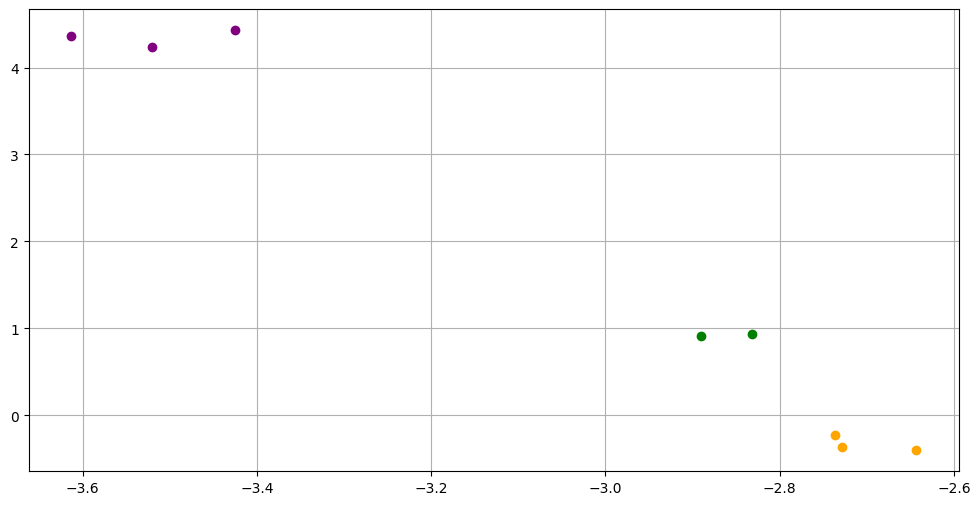

In [120]:
fig, ax = plt.subplots(1,1, figsize=(12,6))

plt.scatter(*zip(*grupos[0]), color='purple', marker='o')
plt.scatter(*zip(*grupos[1]), color='green', marker='o')
plt.scatter(*zip(*grupos[2]), color='orange', marker='o')

plt.grid()

plt.show()

In [121]:
def single_layer_perceptron(entry_layer ,n_entry, n_output, Ws, act_fct = lambda x: x):

    Ws_copy = Ws.copy()
    entry_layer_copy = np.array(entry_layer).copy()

    entry_layer_copy = np.append(entry_layer_copy, -1)

    output = np.zeros(n_output)
    for j in range(n_output):
        for i in range(n_entry + 1):
            output[j] += Ws_copy[i * n_output + j] * entry_layer_copy[i]
        output[j] = act_fct(output[j])


    return output

In [125]:
W = [1, 1, 1, 1, 1, 1 ,1, 1]
entry = [5, 2, 3]

print(single_layer_perceptron(entry_layer=entry,
                              n_entry=3,
                              n_output=2,
                              Ws=W,
                              act_fct=lambda x: x**2))

[81. 81.]
